# Identificación de Señales con las Manos utilizando Visión por Computadora

En el campo de la visión por computadora, la interpretación automática de señales con las manos ha ganado mucha relevancia. Estas técnicas no solo permiten construir juegos interactivos, sino que también se aplican en áreas como el reconocimiento de lenguaje de señas para mejorar la comunicación entre personas sordas y oyentes. Este proyecto tiene como objetivo específico identificar correctamente las señas de piedra, papel y tijeras, que se podría utilizar para la creación de juegos en línea como a mejorar las interfaces de comunicación basadas en gestos.

**Objetivo del Proyecto**


El propósito central es construir un sistema de clasificación preciso que pueda identificar las señas de piedra, papel y tijeras mediante el análisis de imágenes de manos utilizando modelos de aprendizaje automático y aprendizaje profundo. Con un sistema de este tipo, no solo podemos crear experiencias de juegos en línea, sino que también podemos adaptar la misma tecnología a otras aplicaciones como:

Traducción del lenguaje de señas: Facilitando la comunicación en tiempo real para personas sordas.

Interfaces controladas por gestos: Dispositivos o software que responden a movimientos de las manos para mejorar la accesibilidad.

Educación y entretenimiento interactivo: Juegos que refuercen el aprendizaje o brinden experiencias recreativas.

**Metodología Utilizada:**
1. Adquisición de Datos:
Recolección de imágenes correspondientes a los gestos de "Piedra, Papel o Tijeras".
División del dataset en subconjuntos: entrenamiento, validación y prueba.
Preprocesamiento de Imágenes:

2. Conversión de las imágenes a escala de grises.
Normalización de los valores de los píxeles entre 0 y 1.
Segmentación mediante espacio de color HSV para resaltar las áreas de interés (piel).
Aplicación de operaciones morfológicas para reducir ruido.
Binarización de las imágenes y redimensionamiento a 160x160 píxeles.
Entrenamiento de Modelos:

3. Entrenamiento con tres algoritmos: MLP, CNN y Random Forest (RF), tanto con datos preprocesados como sin preprocesar.
Optimización utilizando las métricas de Accuracy, Precision, Recall y F1-Score.

4. Evaluación y Comparación:
Evaluación de cada modelo con los datos de prueba.
Comparación del rendimiento con base en las métricas obtenidas.
Análisis del impacto del preprocesamiento sobre los resultados de los modelos.

## Librerías

In [1]:
## Librerías

import numpy as np
import cv2  # OpenCV
import os
import pandas as pd
from PIL import Image  # Pillow
import matplotlib.pyplot as plt
import tensorflow as tf
from albumentations import Compose, HorizontalFlip, RandomBrightnessContrast
from sklearn.model_selection import train_test_split
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.ensemble import RandomForestClassifier


## Cargar las imágenes  

In [2]:
# Ruta principal donde se encuentran las carpetas (ajusta según tu caso)
base_path = 'C:/Users/lihel/OneDrive/Documentos/UNINORTE/3.Visionporcomputador/Proyecto/'

# Nombres de las carpetas y etiquetas correspondientes
categories = {
    'paper': 0,
    'rock': 1,
    'scissors': 2
}

# Lista para almacenar los datos
data = []

# Cargar imágenes y etiquetas
for category, label in categories.items():
    folder_path = os.path.join(base_path, category)
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        # Cargar la imagen con OpenCV y redimensionarla
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (160, 160))
            data.append([img, label])

# Convertir los datos a un DataFrame de Pandas
df = pd.DataFrame(data, columns=['image', 'label'])

print(df.head())  # Mostrar las primeras filas del DataFrame
print(f"Total de imágenes cargadas: {len(df)}")

                                               image  label
0  [[[52, 142, 64], [51, 141, 62], [53, 141, 63],...      0
1  [[[34, 115, 32], [32, 114, 31], [36, 115, 33],...      0
2  [[[42, 123, 37], [39, 120, 34], [39, 120, 34],...      0
3  [[[20, 91, 18], [18, 93, 18], [19, 95, 18], [2...      0
4  [[[16, 97, 18], [16, 98, 17], [16, 99, 18], [2...      0
Total de imágenes cargadas: 2188


Visualizar imágenes

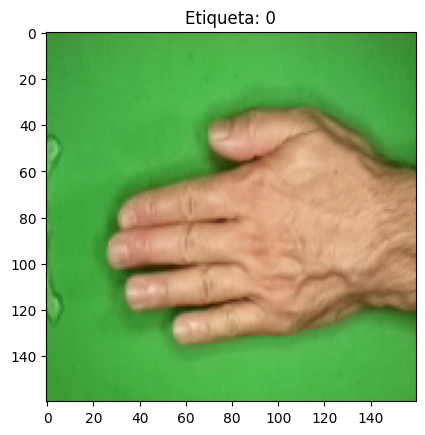

In [3]:
# Mostrar la primera imagen del dataset
plt.imshow(cv2.cvtColor(df['image'][0], cv2.COLOR_BGR2RGB))
plt.title(f"Etiqueta: {df['label'][0]}")
plt.show()


### Dividir el dataset en train y test

In [4]:
# Dividir entre train y test
X = df['image'].tolist()  # Convertimos las imágenes a lista
y = df['label'].tolist()  # Convertimos las etiquetas a lista

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=68)
print(f"Train: {len(X_train)}, Test: {len(X_test)}")


Train: 1750, Test: 438


### Normalizar
Los modelos de aprendizaje automático requieren que las imágenes se conviertan en arrays NumPy y se normalicen.

In [5]:
# Convertir las imágenes y etiquetas a arrays NumPy
X_train = np.array(X_train) / 255.0  # Normalizamos los valores a [0, 1]
X_test = np.array(X_test) / 255.0
y_train = np.array(y_train)
y_test = np.array(y_test)

## Creación de modelo sin preprocesar imágenes  

**Métodos Utilizados y Justificación**

En este proyecto se ha implementado y comparado el rendimiento de tres modelos diferentes:

- *MLP (Perceptrón Multicapa)*

El MLP es un modelo de red neuronal que utiliza capas completamente conectadas.
Es útil para tareas básicas de clasificación cuando los datos ya están bien preprocesados y los patrones relevantes son evidentes.
En este caso, utilizamos el MLP como una línea de base para observar cómo se comporta con imágenes aplanadas y procesadas.


- *CNN (Red Neuronal Convolucional)*

La CNN es especialmente adecuada para procesar imágenes porque utiliza filtros convolucionales que detectan características relevantes, como bordes y texturas.
Este modelo aprende de forma jerárquica: primero detecta patrones simples (líneas y bordes) y luego combina estos patrones para formar representaciones más complejas.
Dado que las señas requieren capturar detalles visuales de las manos (como la forma de los dedos y su posición), la CNN es un modelo muy potente para esta tarea.

Ventaja: Excelente rendimiento en clasificación de imágenes complejas.


- *Random Forest (RF)*

El Random Forest es un algoritmo basado en múltiples árboles de decisión que combina los resultados para mejorar la precisión.
Es muy eficaz para trabajar con datos tabulares y también puede aplicarse a imágenes procesadas y representadas en forma de vectores.
Este modelo se utiliza en el proyecto para comparar su rendimiento con los modelos neuronales y ver si un enfoque basado en ensembles puede ser una alternativa competitiva.

Ventaja: Robusto ante ruido y no se sobreajusta fácilmente.


### Funciones para Métricas y Tabla de Contingencia
Crear funciones para calcular la matriz de confusión, exactitud, precision, recall y f1-score, dado que cada uno de estos modelos aporta enfoques diferentes en la clasificación, y la comparación entre ellos nos permite identificar cuál es más adecuado para la tarea específica de reconocer las señas de las manos.

In [6]:
# DataFrame para almacenar las métricas de cada modelo
metricas_modelos = pd.DataFrame(columns=['Modelo', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

def calcular_métricas(y_true, y_pred, nombre_modelo):
    """Calcula las métricas y guarda los resultados en el DataFrame."""
    # Obtener las métricas
    reporte = classification_report(y_true, y_pred, output_dict=True)
    accuracy = accuracy_score(y_true, y_pred)

    # Extraer promedios de precision, recall y f1-score (macro avg)
    precision = reporte['macro avg']['precision']
    recall = reporte['macro avg']['recall']
    f1_score = reporte['macro avg']['f1-score']

    # Guardar las métricas en el DataFrame
    global metricas_modelos
    metricas_modelos = pd.concat([metricas_modelos, pd.DataFrame({
        'Modelo': [nombre_modelo],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1-Score': [f1_score]
    })], ignore_index=True)

    # Imprimir el reporte de clasificación
    print(f"Reporte de Clasificación para {nombre_modelo}:")
    print(classification_report(y_true, y_pred))
    print(f"Exactitud: {accuracy:.2f}\n")

def graficar_heatmap(y_true, y_pred, nombre_modelo):
    """Crea un mapa de calor para la matriz de confusión."""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
                xticklabels=["Papel", "Piedra", "Tijera"],
                yticklabels=["Papel", "Piedra", "Tijera"])
    plt.title(f'Matriz de Confusión - {nombre_modelo}')
    plt.xlabel('Predicción')
    plt.ylabel('Valor Real')
    plt.show()


### Red Neuronal Simple (MLP)

Reporte de Clasificación para MLP Dataset Sin Preprocesar:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       145
           1       0.96      0.87      0.91       166
           2       0.86      0.98      0.92       127

    accuracy                           0.91       438
   macro avg       0.91      0.92      0.91       438
weighted avg       0.91      0.91      0.91       438

Exactitud: 0.91



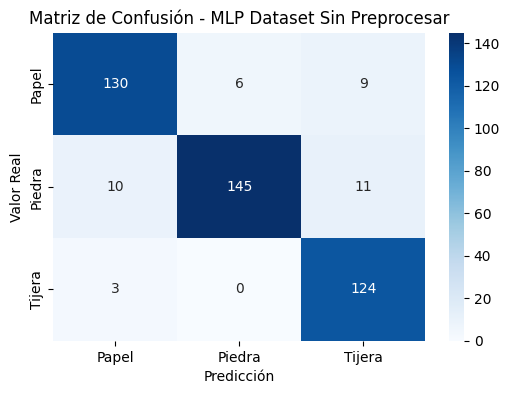

In [7]:
# Definir y entrenar el modelo MLP
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300, random_state=42)
mlp.fit(X_train.reshape(len(X_train), -1), y_train)  # Aplanar las imágenes

# Predicciones
y_pred_mlp = mlp.predict(X_test.reshape(len(X_test), -1))

# Evaluación
calcular_métricas(y_test, y_pred_mlp, "MLP Dataset Sin Preprocesar")
graficar_heatmap(y_test, y_pred_mlp, "MLP Dataset Sin Preprocesar")

### Convolutional Neural Network (CNN)

Epoch 1/15
55/55 [==============================] - 4s 21ms/step - loss: 1.9010 - accuracy: 0.5686 - val_loss: 0.4826 - val_accuracy: 0.8105
Epoch 2/15
55/55 [==============================] - 1s 16ms/step - loss: 0.4012 - accuracy: 0.8646 - val_loss: 0.3692 - val_accuracy: 0.8927
Epoch 3/15
55/55 [==============================] - 1s 16ms/step - loss: 0.2688 - accuracy: 0.9269 - val_loss: 0.3514 - val_accuracy: 0.8858
Epoch 4/15
55/55 [==============================] - 1s 17ms/step - loss: 0.2085 - accuracy: 0.9411 - val_loss: 0.2992 - val_accuracy: 0.9041
Epoch 5/15
55/55 [==============================] - 1s 17ms/step - loss: 0.1655 - accuracy: 0.9549 - val_loss: 0.2484 - val_accuracy: 0.9201
Epoch 6/15
55/55 [==============================] - 1s 16ms/step - loss: 0.1428 - accuracy: 0.9554 - val_loss: 0.2324 - val_accuracy: 0.9315
Epoch 7/15
55/55 [==============================] - 1s 16ms/step - loss: 0.0914 - accuracy: 0.9777 - val_loss: 0.2133 - val_accuracy: 0.9406
Epoch 8/15
55

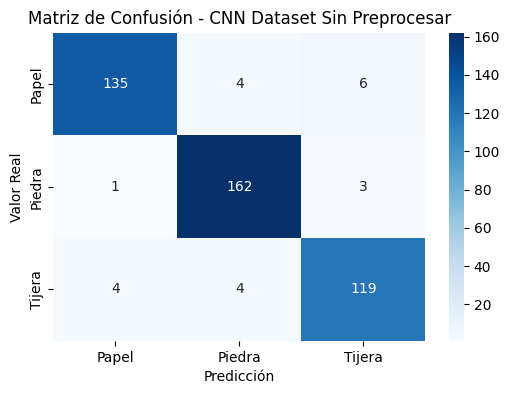

In [8]:
# Definir la arquitectura del modelo CNN
cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(160, 160, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

# Compilar el modelo
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
cnn.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

# Predicciones
y_pred_cnn = np.argmax(cnn.predict(X_test), axis=1)

# Evaluación
calcular_métricas(y_test, y_pred_cnn, "CNN Dataset Sin Preprocesar")
graficar_heatmap(y_test, y_pred_cnn, "CNN Dataset Sin Preprocesar")


### Ramdon Forest

Reporte de Clasificación para RF Dataset Sin Preprocesar:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       145
           1       0.96      0.95      0.96       166
           2       0.90      0.97      0.93       127

    accuracy                           0.94       438
   macro avg       0.94      0.94      0.94       438
weighted avg       0.94      0.94      0.94       438

Exactitud: 0.94



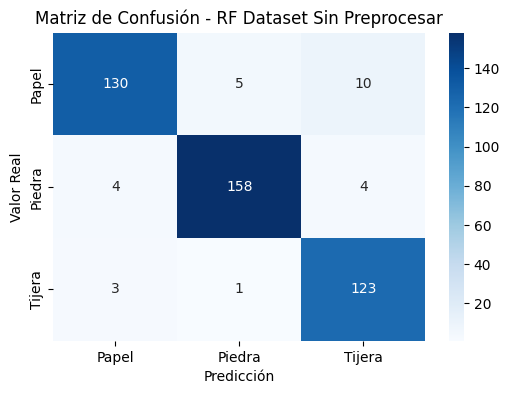

In [9]:
# Definir y entrenar el modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train.reshape(len(X_train), -1), y_train)

# Predicciones
y_pred_rf = rf.predict(X_test.reshape(len(X_test), -1))

# Evaluación
calcular_métricas(y_test, y_pred_rf, "RF Dataset Sin Preprocesar")
graficar_heatmap(y_test, y_pred_rf, "RF Dataset Sin Preprocesar")

Comparación de modelos

In [10]:
print("Comparación de Modelos:")
print(metricas_modelos)

Comparación de Modelos:
                        Modelo  Accuracy  Precision    Recall  F1-Score
0  MLP Dataset Sin Preprocesar  0.910959   0.910156  0.915475  0.910911
1  CNN Dataset Sin Preprocesar  0.949772   0.948971  0.947982  0.948329
2   RF Dataset Sin Preprocesar  0.938356   0.936710  0.938954  0.937127


## Creación de modelos con preprocesamiento de imágenes

### Preprocesamiento

A continuación, se realiza un preprocesamiento de imágenes, cuyo objetivo es preparar las imágenes para ser utilizadas para entrenar nuevamente los modelos antes mencionados. Seguido se detalla cada paso del algoritmo, su propósito y ventajas.

*Funcionamiento del Algoritmo*
1. Asegurar formato uint8:
Si la imagen tiene valores en formato flotante, se convierte a formato uint8 escalando los valores a un rango de 0-255, ya que muchas funciones de procesamiento de imágenes en OpenCV requieren este tipo de dato.

2. Conversión a espacio de color HSV:
La imagen se convierte del espacio de color BGR (Blue-Green-Red) al espacio HSV (Hue-Saturation-Value). El espacio HSV es más apropiado para segmentación basada en color, ya que facilita la identificación de tonos específicos, como el color de la piel.

3. Segmentación por color de piel:
Se define un rango de color de piel en HSV, utilizando:

    lower_skin = [0, 10, 60]
    upper_skin = [25, 255, 255]

    Con estos límites, se genera una máscara binaria que destaca las regiones de piel (en blanco) mientras oculta el fondo y otros elementos (en negro).

4. Operaciones morfológicas para limpiar ruido:
Se utilizan técnicas morfológicas para eliminar ruido y mejorar la calidad de la segmentación:

    MORPH_OPEN: Elimina pequeñas partículas de ruido.
    Dilate: Aumenta el tamaño de las áreas blancas para asegurar que los bordes no se pierdan.

5. Conversión a escala de grises:
Si la imagen tiene múltiples canales (BGR), se convierte a escala de grises, lo que simplifica su manipulación para tareas de umbralización y análisis de patrones.

6. Normalización:
Se normalizan los valores de los píxeles entre 0 y 1 para que sean consistentes con otras técnicas de procesamiento y para mejorar la estabilidad de los modelos que usen estas imágenes.

7. Umbralización:
Se aplica binarización para resaltar las regiones importantes. En este caso, los píxeles con valores mayores a 0.45 se convierten en 1, y los demás en 0, generando una imagen binaria clara.

8. Redimensionamiento:
La imagen procesada se redimensiona a 160x160 píxeles, adaptándola a la entrada esperada por los modelos de aprendizaje profundo.


*Ventajas*

- Segmentación precisa:
Utilizar el espacio de color HSV mejora la precisión en la detección de la piel, comparado con otros espacios de color como RGB.

- Eliminación de ruido:
Las operaciones morfológicas permiten limpiar la imagen, garantizando que los modelos reciban datos relevantes y sin interferencias.

- Compatibilidad con modelos:
La conversión a escala de grises y el redimensionamiento facilitan la integración con arquitecturas de CNN, MLP o Random Forest.

In [11]:
def preprocesar_imagen(image):
    """
    Preprocesa la imagen: convierte a escala de grises, normaliza, umbraliza y redimensiona.
    """
    # Asegurar que la imagen esté en formato uint8
    if image.dtype != 'uint8':
        image = (image * 255).astype('uint8')

    # Convertir a espacio de color HSV para segmentar por color
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Definir rangos de color para detectar la piel
    lower_skin = np.array([0, 10, 60], dtype=np.uint8)
    upper_skin = np.array([25, 255, 255], dtype=np.uint8)

    # Crear máscara binaria donde la piel es blanca (255) y el resto es negro (0)
    mascara = cv2.inRange(hsv, lower_skin, upper_skin)

    # Aplicar operaciones morfológicas para limpiar ruido
    kernel = np.ones((5, 5), np.uint8)
    mascara = cv2.morphologyEx(mascara, cv2.MORPH_OPEN, kernel, iterations=2)
    mascara = cv2.dilate(mascara, kernel, iterations=1)

    # Verificar si la imagen tiene más de una canal (BGR) y convertirla a escala de grises
    if len(image.shape) == 3:
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        image_gray = image

    # Normalizar los valores entre 0 y 1 (por si se necesita)
    image_gray = image_gray / 255.0

    # Aplicar umbral adaptativo o binarización con un valor predefinido
    _, imagen_binarizada = cv2.threshold(image_gray, 0.45, 1, cv2.THRESH_BINARY)

    # Redimensionar la imagen a 160x160
    img_final = cv2.resize(imagen_binarizada, (160, 160))

    return img_final


In [12]:
def mostrar_ejemplos_preprocesamiento(imagenes, num=5):
    """Muestra algunas imágenes preprocesadas."""
    fig, axes = plt.subplots(1, num, figsize=(15, 5))
    for i in range(num):
        axes[i].imshow(imagenes[i], cmap='gray')
        axes[i].axis('off')
    plt.show()


X_train_prep shape: (1750, 160, 160), X_test_prep shape: (438, 160, 160)


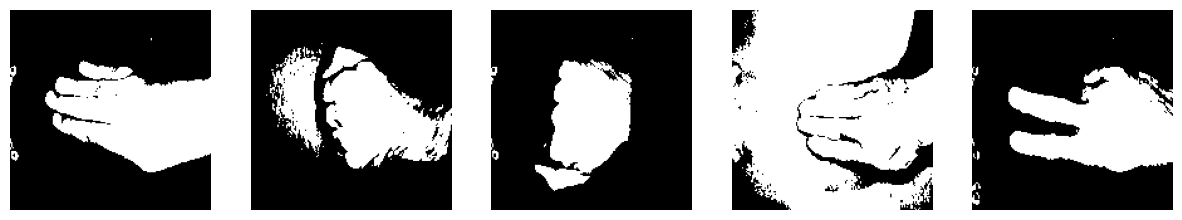

In [13]:
X_train_prep = np.array([preprocesar_imagen(img) for img in X_train])
X_test_prep = np.array([preprocesar_imagen(img) for img in X_test])

print(f"X_train_prep shape: {X_train_prep.shape}, X_test_prep shape: {X_test_prep.shape}")

# Mostrar algunos ejemplos
mostrar_ejemplos_preprocesamiento(X_train_prep)

### MPL Preprocesado 

Reporte de Clasificación para MLP Dataset Preprocesado:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       145
           1       0.86      0.86      0.86       166
           2       0.89      0.83      0.86       127

    accuracy                           0.86       438
   macro avg       0.86      0.86      0.86       438
weighted avg       0.86      0.86      0.86       438

Exactitud: 0.86



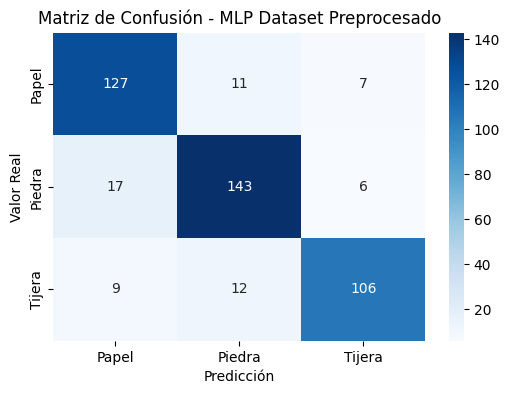

In [14]:
# Asegurarse de usar las imágenes preprocesadas
mlpp = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300, random_state=42)

# Aplanar las imágenes preprocesadas para el MLP
X_train_flat = X_train_prep.reshape(len(X_train_prep), -1)
X_test_flat = X_test_prep.reshape(len(X_test_prep), -1)

# Entrenamiento del modelo MLP
mlpp.fit(X_train_flat, y_train)

# Predicciones del modelo
y_pred_mlp = mlpp.predict(X_test_flat)

# Evaluación del MLP
calcular_métricas(y_test, y_pred_mlp, "MLP Dataset Preprocesado")
graficar_heatmap(y_test, y_pred_mlp, "MLP Dataset Preprocesado")


### CNN Preprocesado

Epoch 1/15
55/55 [==============================] - 2s 21ms/step - loss: 1.8940 - accuracy: 0.5126 - val_loss: 0.8090 - val_accuracy: 0.6027
Epoch 2/15
55/55 [==============================] - 1s 16ms/step - loss: 0.6782 - accuracy: 0.7011 - val_loss: 0.6584 - val_accuracy: 0.6781
Epoch 3/15
55/55 [==============================] - 1s 16ms/step - loss: 0.5084 - accuracy: 0.7663 - val_loss: 0.5544 - val_accuracy: 0.7260
Epoch 4/15
55/55 [==============================] - 1s 16ms/step - loss: 0.3810 - accuracy: 0.8211 - val_loss: 0.4882 - val_accuracy: 0.7694
Epoch 5/15
55/55 [==============================] - 1s 16ms/step - loss: 0.3105 - accuracy: 0.8520 - val_loss: 0.6036 - val_accuracy: 0.7740
Epoch 6/15
55/55 [==============================] - 1s 16ms/step - loss: 0.2457 - accuracy: 0.8920 - val_loss: 0.4900 - val_accuracy: 0.8128
Epoch 7/15
55/55 [==============================] - 1s 17ms/step - loss: 0.1737 - accuracy: 0.9377 - val_loss: 0.5964 - val_accuracy: 0.7580
Epoch 8/15
55

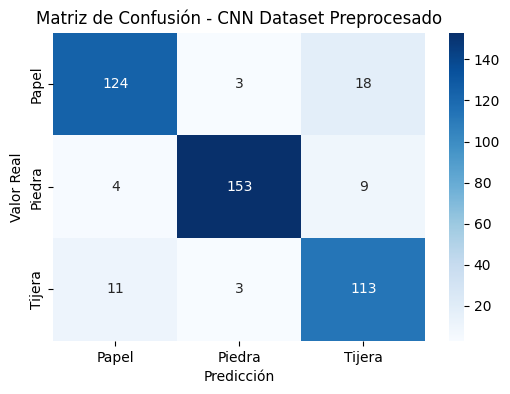

In [15]:
# Definir la arquitectura del modelo CNN para imágenes en escala de grises
cnnp = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(160, 160, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

# Compilar el modelo
cnnp.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
cnnp.fit(X_train_prep, y_train, epochs=15, validation_data=(X_test_prep, y_test))

# Predicciones
y_pred_cnn = np.argmax(cnnp.predict(X_test_prep), axis=1)

# Evaluación
calcular_métricas(y_test, y_pred_cnn, "CNN Dataset Preprocesado")
graficar_heatmap(y_test, y_pred_cnn, "CNN Dataset Preprocesado")


### Ramdon Forest Preprocesado

Reporte de Clasificación para RF Dataset Preprocesado:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       145
           1       0.86      0.86      0.86       166
           2       0.89      0.83      0.86       127

    accuracy                           0.86       438
   macro avg       0.86      0.86      0.86       438
weighted avg       0.86      0.86      0.86       438

Exactitud: 0.86



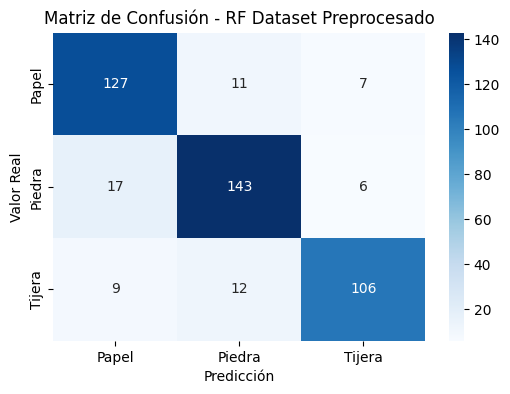

In [16]:

# Definir y entrenar el modelo Random Forest
rfp = RandomForestClassifier(n_estimators=100, random_state=42)
rfp.fit(X_train_prep.reshape(len(X_train_prep), -1), y_train)

# Predicciones
y_pred_rf = rfp.predict(X_test_prep.reshape(len(X_test_prep), -1))

# Evaluación
calcular_métricas(y_test, y_pred_mlp, "RF Dataset Preprocesado")
graficar_heatmap(y_test, y_pred_mlp, "RF Dataset Preprocesado")

## Comparación de métricas de modelos en imágenes de test

In [17]:
print("Comparación de Modelos:")
print(metricas_modelos)

Comparación de Modelos:
                        Modelo  Accuracy  Precision    Recall  F1-Score
0  MLP Dataset Sin Preprocesar  0.910959   0.910156  0.915475  0.910911
1  CNN Dataset Sin Preprocesar  0.949772   0.948971  0.947982  0.948329
2   RF Dataset Sin Preprocesar  0.938356   0.936710  0.938954  0.937127
3     MLP Dataset Preprocesado  0.858447   0.860756  0.857318  0.858528
4     CNN Dataset Preprocesado  0.890411   0.887164  0.888874  0.887073
5      RF Dataset Preprocesado  0.858447   0.860756  0.857318  0.858528


## Evaluación de modelos con imágenes reales

### Cargar Imágenes

In [18]:
# Ruta principal donde se encuentran las carpetas (ajusta según tu caso)
base_path = 'C:/Users/lihel/OneDrive/Documentos/UNINORTE/3.Visionporcomputador/Proyecto/'

# Nombres de las carpetas y etiquetas correspondientes
categories = {
    'paper_r': 0,
    'rock_r': 1,
    'scissors_r': 2
}

# Lista para almacenar los datos
datar = []

# Cargar imágenes y etiquetas
for category, label in categories.items():
    folder_path = os.path.join(base_path, category)
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        # Cargar la imagen con OpenCV y redimensionarla
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (160, 160))
            datar.append([img, label])

# Convertir los datos a un DataFrame de Pandas
dfr = pd.DataFrame(datar, columns=['image', 'label'])

print(dfr.head())  # Mostrar las primeras filas del DataFrame
print(f"Total de imágenes cargadas: {len(dfr)}")

                                               image  label
0  [[[137, 148, 149], [117, 130, 129], [121, 135,...      0
1  [[[109, 109, 96], [70, 78, 73], [60, 61, 59], ...      0
2  [[[72, 79, 75], [73, 78, 74], [49, 52, 49], [4...      0
3  [[[46, 42, 40], [46, 42, 40], [46, 42, 40], [4...      0
4  [[[63, 83, 59], [63, 82, 58], [62, 81, 58], [6...      0
Total de imágenes cargadas: 29


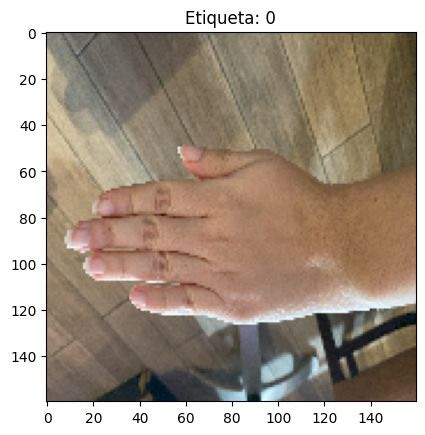

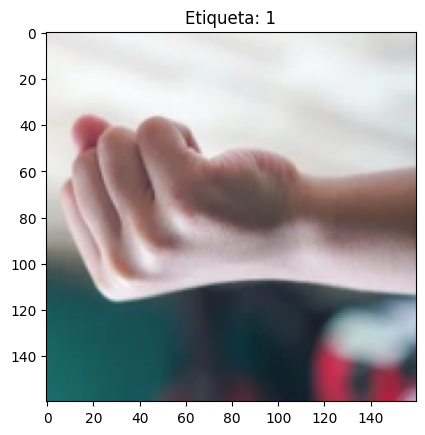

In [19]:
# Mostrar la primera imagen del dataset
plt.imshow(cv2.cvtColor(dfr['image'][0], cv2.COLOR_BGR2RGB))
plt.title(f"Etiqueta: {dfr['label'][0]}")
plt.show()

# Mostrar la primera imagen del dataset
plt.imshow(cv2.cvtColor(dfr['image'][12], cv2.COLOR_BGR2RGB))
plt.title(f"Etiqueta: {dfr['label'][12]}")
plt.show()

In [20]:
# Dividir entre imágenes y etiquetas
X = dfr['image'].tolist()  # Convertimos las imágenes a lista
y = dfr['label'].tolist()  # Convertimos las etiquetas a lista

In [21]:
# Convertir las imágenes y etiquetas a arrays NumPy
X = np.array(X) / 255.0  # Normalizamos los valores a [0, 1]
y = np.array(y)

## Evaluación de modelos

### MLP sin preprocesar imágenes

Reporte de Clasificación para MLP Reales:
              precision    recall  f1-score   support

           0       0.36      0.62      0.45         8
           1       0.67      0.20      0.31        10
           2       0.33      0.36      0.35        11

    accuracy                           0.38        29
   macro avg       0.45      0.40      0.37        29
weighted avg       0.45      0.38      0.36        29

Exactitud: 0.38



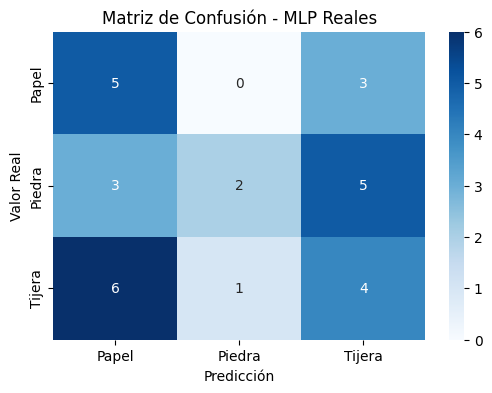

In [22]:
# Predicciones
y_pred_mlp = mlp.predict(X.reshape(len(X), -1))

# Evaluación
calcular_métricas(y, y_pred_mlp, "MLP Reales")
graficar_heatmap(y, y_pred_mlp, "MLP Reales")

### CNN sin preprocesar imágenes

1/1 [==============================] - 0s 212ms/step
Reporte de Clasificación para CNN Reales:
              precision    recall  f1-score   support

           0       0.28      0.88      0.42         8
           1       0.00      0.00      0.00        10
           2       0.50      0.18      0.27        11

    accuracy                           0.31        29
   macro avg       0.26      0.35      0.23        29
weighted avg       0.27      0.31      0.22        29

Exactitud: 0.31



c:\Users\lihel\anaconda3\envs\lihella39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lihel\anaconda3\envs\lihella39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lihel\anaconda3\envs\lihella39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\l

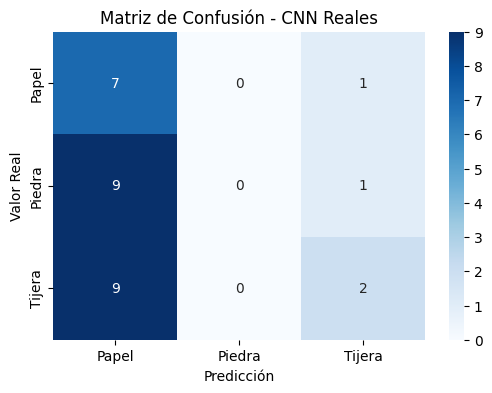

In [23]:
# Predicciones
y_pred_cnn = np.argmax(cnn.predict(X), axis=1)

# Evaluación
calcular_métricas(y, y_pred_cnn, "CNN Reales")
graficar_heatmap(y, y_pred_cnn, "CNN Reales")

### RF sin preprocesar imágenes

Reporte de Clasificación para RF Reales:
              precision    recall  f1-score   support

           0       0.30      1.00      0.46         8
           1       1.00      0.10      0.18        10
           2       1.00      0.09      0.17        11

    accuracy                           0.34        29
   macro avg       0.77      0.40      0.27        29
weighted avg       0.81      0.34      0.25        29

Exactitud: 0.34



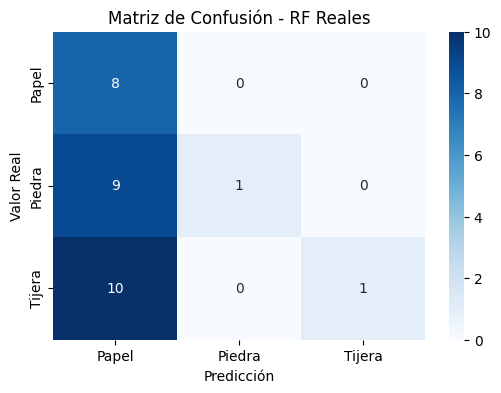

In [24]:
# Predicciones
y_pred_rf = rf.predict(X.reshape(len(X), -1))

# Evaluación
calcular_métricas(y, y_pred_rf, "RF Reales")
graficar_heatmap(y, y_pred_rf, "RF Reales")

### MLP con imágenes preprocesadas

X_train_prep shape: (29, 160, 160)


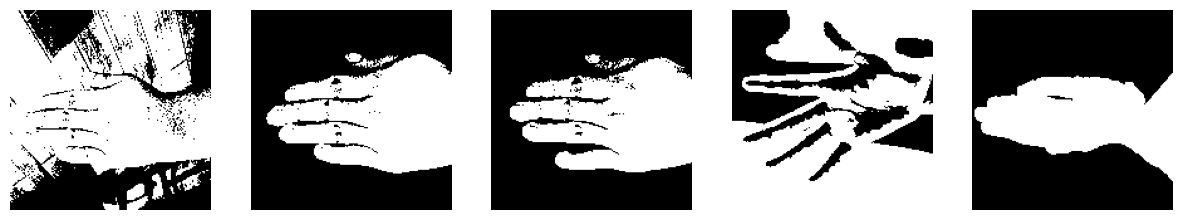

In [25]:
X_prep = np.array([preprocesar_imagen(img) for img in X])

print(f"X_train_prep shape: {X_prep.shape}")

# Mostrar algunos ejemplos
mostrar_ejemplos_preprocesamiento(X_prep)

Reporte de Clasificación para MLP Reales Preprocesadas:
              precision    recall  f1-score   support

           0       0.39      0.88      0.54         8
           1       0.67      0.20      0.31        10
           2       0.50      0.36      0.42        11

    accuracy                           0.45        29
   macro avg       0.52      0.48      0.42        29
weighted avg       0.53      0.45      0.41        29

Exactitud: 0.45



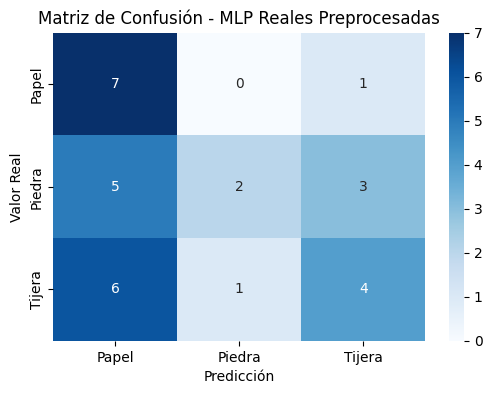

In [26]:
# Predicciones
y_pred_mlp = mlpp.predict(X_prep.reshape(len(X_prep), -1))

# Evaluación
calcular_métricas(y, y_pred_mlp, "MLP Reales Preprocesadas")
graficar_heatmap(y, y_pred_mlp, "MLP Reales Preprocesadas")

### CNN imágenes preprocesadas

1/1 [==============================] - 0s 64ms/step
Reporte de Clasificación para CNN Reales Preprocesadas:
              precision    recall  f1-score   support

           0       0.60      0.38      0.46         8
           1       0.45      0.50      0.48        10
           2       0.54      0.64      0.58        11

    accuracy                           0.52        29
   macro avg       0.53      0.50      0.51        29
weighted avg       0.53      0.52      0.51        29

Exactitud: 0.52



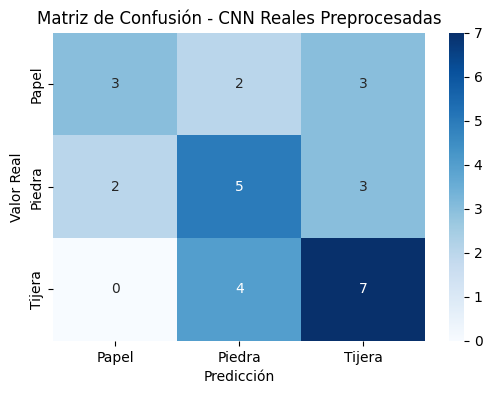

In [27]:
# Predicciones
y_pred_cnn = np.argmax(cnnp.predict(X_prep), axis=1)

# Evaluación
calcular_métricas(y, y_pred_cnn, "CNN Reales Preprocesadas")
graficar_heatmap(y, y_pred_cnn, "CNN Reales Preprocesadas")

### RF con imágenes preprocesadas

Reporte de Clasificación para RF Reales Preprocesadas:
              precision    recall  f1-score   support

           0       0.35      0.88      0.50         8
           1       1.00      0.10      0.18        10
           2       0.50      0.36      0.42        11

    accuracy                           0.41        29
   macro avg       0.62      0.45      0.37        29
weighted avg       0.63      0.41      0.36        29

Exactitud: 0.41



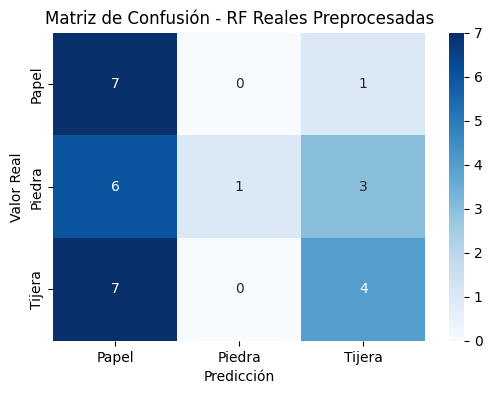

In [28]:
# Predicciones
y_pred_rf = rfp.predict(X_prep.reshape(len(X_prep), -1))

# Evaluación
calcular_métricas(y, y_pred_rf, "RF Reales Preprocesadas")
graficar_heatmap(y, y_pred_rf, "RF Reales Preprocesadas")

## Comparación de final de modelos

In [29]:
print("Comparación de Modelos:")
print(metricas_modelos)

Comparación de Modelos:
                         Modelo  Accuracy  Precision    Recall  F1-Score
0   MLP Dataset Sin Preprocesar  0.910959   0.910156  0.915475  0.910911
1   CNN Dataset Sin Preprocesar  0.949772   0.948971  0.947982  0.948329
2    RF Dataset Sin Preprocesar  0.938356   0.936710  0.938954  0.937127
3      MLP Dataset Preprocesado  0.858447   0.860756  0.857318  0.858528
4      CNN Dataset Preprocesado  0.890411   0.887164  0.888874  0.887073
5       RF Dataset Preprocesado  0.858447   0.860756  0.857318  0.858528
6                    MLP Reales  0.379310   0.452381  0.396212  0.370021
7                    CNN Reales  0.310345   0.260000  0.352273  0.230303
8                     RF Reales  0.344828   0.765432  0.396970  0.268543
9      MLP Reales Preprocesadas  0.448276   0.518519  0.479545  0.422402
10     CNN Reales Preprocesadas  0.517241   0.531002  0.503788  0.507021
11      RF Reales Preprocesadas  0.413793   0.616667  0.446212  0.367624


## Conclusiones

*Conclusión de los Resultados de la Comparación de Modelos*

1. Impacto del Preprocesamiento del Dataset
En todos los modelos (MLP, CNN y RF), el rendimiento disminuye después del preprocesamiento, especialmente en accuracy y F1-Score:
    - MLP: De 91% sin preprocesar a 85.8% con preprocesamiento.
    - CNN: De 94.9% sin preprocesar a 89% con preprocesamiento.
    - Random Forest (RF): De 93.8% sin preprocesar a 85.8% con preprocesamiento.
    
    Esto sugiere que el preprocesamiento aplicado podría estar eliminando características importantes o no alinearse bien con los modelos utilizados. La pérdida de rendimiento puede indicar que los modelos, sin procesamiento adicional, ya manejaban bien los datos originales. Con lo cual se debe ajustar las técnicas de preprocesamiento o explorar arquitecturas que se beneficien más de este tipo de preparación de datos.

2. Comparación entre Modelos (MLP, CNN y RF)
    - CNN (Red Convolucional) mostró el mejor rendimiento general sin preprocesar los datos, con una accuracy del 94.9%. Esto es consistente con la naturaleza de CNN, que se especializa en la detección de patrones complejos, como imágenes, sin necesidad de preprocesamiento excesivo.
    - Random Forest (RF) tuvo un rendimiento ligeramente inferior a CNN, con una accuracy del 93.8% sin preprocesamiento, lo que sugiere que también maneja bien los datos crudos.
    - MLP (Perceptrón Multicapa) tuvo el menor rendimiento entre los tres modelos con datos sin preprocesar (91%), lo que indica que, aunque útil, es menos robusto que CNN y RF para esta tarea.

3. Desempeño en Datos Reales (Escenarios del Mundo Real)
    Los resultados muestran que el rendimiento baja drásticamente cuando los modelos se prueban en datos "reales":
    - MLP: 37.9% sin preprocesamiento, 44.8% con preprocesamiento.
    - CNN: 31% sin preprocesamiento, 51.7% con preprocesamiento.
    - RF: 34.4% sin preprocesamiento, 41.3% con preprocesamiento.
    Estos valores sugieren que los modelos enfrentan dificultades importantes para generalizar a datos del mundo real. Sin embargo, *el preprocesamiento mejora el rendimiento en estos casos*, especialmente en CNN (51.7%). Esto destaca la importancia del preprocesamiento para reducir el ruido en situaciones no controladas.

**Conclusión Final:**
CNN es el modelo más efectivo cuando se trabaja con datos sin preprocesar, lo que lo hace ideal para casos donde se pueden aprovechar imágenes crudas.
El preprocesamiento tiene un impacto positivo en escenarios reales, especialmente en el caso de CNN, donde ayuda al modelo a mejorar su rendimiento.
Random Forest muestra buena precisión, pero su capacidad de generalización es limitada en datos no controlados.
MLP es menos eficiente que CNN y RF para esta tarea, lo que sugiere que modelos más complejos son necesarios para problemas de reconocimiento de patrones visuales.